In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### EDA

In [151]:
data=pd.read_csv('data/DT_data.csv')
data.head()

,a1,a2,a3,Outcome
0,True,Hot,High,No
1,True,Hot,High,No
2,False,Hot,High,Yes
3,False,Cool,Normal,Yes
4,False,Cool,Normal,Yes


In [152]:
data.value_counts()

a1     a2    a3      Outcome
False  Cool  Normal  Yes        3
True   Hot   High    No         3
False  Cool  High    Yes        1
       Hot   High    Yes        1
True   Cool  High    No         1
       Hot   Normal  Yes        1
Name: count, dtype: int64

In [153]:
data['a1'].value_counts()

a1
True     5
False    5
Name: count, dtype: int64

In [154]:
data

,a1,a2,a3,Outcome
0,True,Hot,High,No
1,True,Hot,High,No
2,False,Hot,High,Yes
3,False,Cool,Normal,Yes
4,False,Cool,Normal,Yes
5,True,Cool,High,No
6,True,Hot,High,No
7,True,Hot,Normal,Yes
8,False,Cool,Normal,Yes
9,False,Cool,High,Yes


In [155]:
data.columns

Index(['a1', 'a2', 'a3', 'Outcome'], dtype='object')

In [156]:
data.shape

(10, 4)

In [157]:
data.size

40

In [158]:
data.duplicated().sum()

4

In [159]:
data=data.drop_duplicates()

In [160]:
data.duplicated().sum()

0

In [161]:
data.isna().sum()

a1         0
a2         0
a3         0
Outcome    0
dtype: int64

In [162]:
data.dtypes

a1           bool
a2         object
a3         object
Outcome    object
dtype: object

### Label Encoding

In [164]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in data.select_dtypes(include=['object','bool']).columns:
    data[column] = le.fit_transform(data[column])

In [165]:
data.head()

,a1,a2,a3,Outcome
0,1,1,0,0
2,0,1,0,1
3,0,0,1,1
5,1,0,0,0
7,1,1,1,1


### Splitting X & Y

In [167]:
X = data[['a1', 'a2', 'a3']]
y = data['Outcome']

### Scaling

In [169]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Splitting Test data & train data

In [225]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Logisitc Regression

In [227]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [229]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

Accuracy: 0.5

Confusion Matrix:
 [[0 1]
 [0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



In [176]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [177]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

In [178]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [179]:
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Naive Bayes', 'Support Vector Machine']
predictions = [y_pred, y_pred_knn, y_pred_nb, y_pred_svm]

for model_name, y_pred in zip(models, predictions):
    print(f"\n{model_name} Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Evaluation:
Accuracy: 0.6666666666666666
Confusion Matrix:
 [[0 1]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3


K-Nearest Neighbors Evaluation:
Accuracy: 0.6666666666666666
Confusion Matrix:
 [[0 1]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3


Naive Bayes Evaluation:
Accuracy: 0.6666666666666666
Confusion Matrix:
 [[1 0]
 [1 1]]
Classification Rep

### Decision Tree algorithm

In [233]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(random_state=42,criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}%")

Accuracy: 100.0%


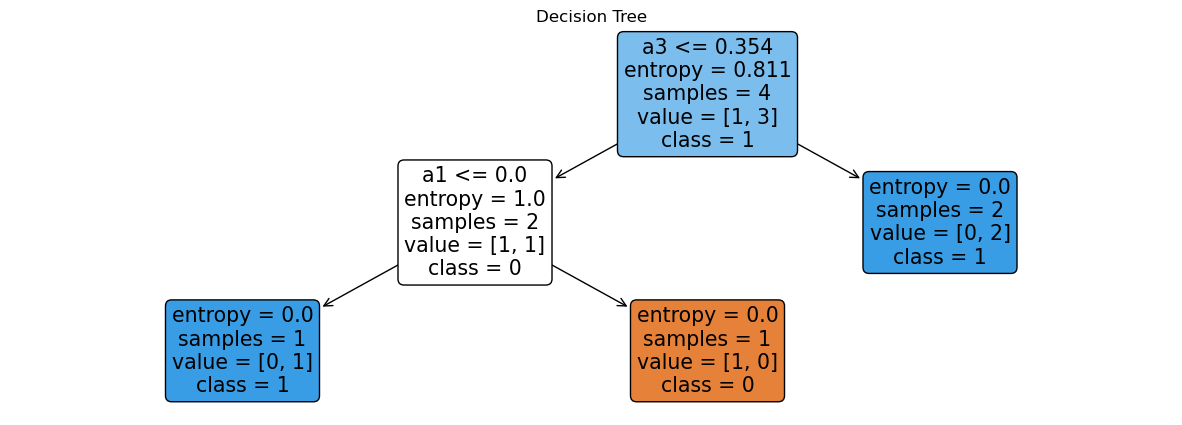

In [247]:
from sklearn import tree
plt.figure(figsize=(15,5))
tree.plot_tree(clf, feature_names=['a1', 'a2', 'a3'], class_names=['0','1'], filled=True, rounded=True)
plt.title("Decision Tree")
plt.show()